# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Weather URL
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


In [2]:
class Keys:
    is_fetch_ok = "Is_Fetch_Ok"
    city_id     = "City_ID"
    city        = "City"
    cloudiness  = "Cloudiness"
    country     = "Country"
    date        = "Date"
    humidity    = "Humidity"
    lat         = "Lat"
    lng         = "Lng"
    max_temp    = "Max Temp"
    wind_speed  = "Wind Speed"   

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs     = []

#Keeping track of processed cities
cities       = []

#Stores all weather-relevant data for a given set of coordinates
weather_container = []

#************************************#
#*            Test Vars             *#
#************************************#
is_test           = False #TODO remove
test_humidity     = 100   #TODO remove
#************************************#
#*            Test Vars             *#
#************************************#

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    latitude  = lat_lng[0]
    longitude = lat_lng[1]
    
    city_name    = citipy.nearest_city(latitude, longitude).city_name
    country_code = citipy.nearest_city(latitude, longitude).country_code

    # If the city is unique, then add it to 'cities'
    if city_name not in cities:
        
        weather_hash  = {
                             Keys.is_fetch_ok : False,
                             Keys.city_id     : None, 
                             Keys.city        : city_name, 
                             Keys.cloudiness  : None, 
                             Keys.country     : country_code.upper(),
                             Keys.date        : None,
                             Keys.humidity    : None,
                             Keys.lat         : latitude,
                             Keys.lng         : longitude,
                             Keys.max_temp    : None,
                             Keys.wind_speed  : None
                        }        
        
        weather_container.append(weather_hash)
        cities.append(city_name)
        
# Print the city count to confirm (sufficient) count
print(f"{len(cities)}")

596


In [4]:
def print_city_log(status_code : int, 
                   city_name   : str       = None, 
                   rec_set     : int       = None, 
                   success_fetch_cntr :int = None) -> None:
    """
    Prints running log of city number and name, if and only if, if the city contains 500+ people, otherwise
    the city name will not be printed

    :param int status_code: The status code of the Response
    :param str city_name: The city name for a given set of coordinates
    :param int rec_set: The count of the processing record set
    :param int success_fetch_cntr: The current record fetch count
    """        
    if(status_code == 200):
        print(f"Processing Record {success_fetch_cntr} of Set {rec_set} | {city_name}")
    else:
        print("City not found. Skipping...")

In [5]:
def print_line_sep() -> None:
    
    """
    Prints a line delimiter
    """       
    
    print("----------------------------")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Build query URL
  
#out_cols = ["City_ID","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

total_success_fetch_cntr = 0
rec_set_cntr = 0
set_cntr = 1

print("Beginning Data Retrieval")
print_line_sep()

for i in range(len(weather_container)):
    
    weather_hash = weather_container[i]
    city_name    = weather_hash[Keys.city]
    latitude     = weather_hash[Keys.lat]
    longitude    = weather_hash[Keys.lng]
    country_code = weather_hash[Keys.country].lower()
    unit = "imperial"
    mode = "json"
    
    #weather_query_url = weather_url + "appid=" + weather_api_key + "&q=" + city_name + "&units=imperial"
    
    weather_query_url = (f"{weather_url}lat={latitude}&lon={longitude}&cnt={country_code}&units={unit}&mode={mode}&appid={weather_api_key}")
    
    if ((i+1) % (60+1)) != 0:
        
        weather_response  = requests.get(weather_query_url)
        status_code       = weather_response.status_code

        if status_code == 200:

            weather_json = weather_response.json()
            
            rec_set_cntr += 1
            
            weather_hash[Keys.is_fetch_ok] = True
            weather_hash[Keys.city_id]     = total_success_fetch_cntr #id starts at 0 not 1
            total_success_fetch_cntr += 1
            
            try:
            
                weather_hash[Keys.date]        = weather_json["dt"]
                
                weather_hash[Keys.max_temp]    = weather_json["main"]["temp_max"]
                weather_hash[Keys.humidity]    = weather_json["main"]["humidity"]      
                weather_hash[Keys.wind_speed]  = weather_json["wind"]["speed"]
                weather_hash[Keys.cloudiness]  = weather_json["clouds"]["all"]
                
                if is_test:
                    time.sleep(1)              
            
            except IndexError as ie:
                print(f"Index Exception occured {ie}")
                break
                
            except Exception as e:
                print(f"Index Exception occured {e}")
                break                
                
            else:
                      
                print_city_log(status_code,
                               city_name,
                               set_cntr,
                               rec_set_cntr)  
        else:
            print_city_log(status_code)
    
    else:
        set_cntr    += 1
        rec_set_cntr = 0
        time.sleep(60)

print_line_sep()
print("Data Retrieval Complete")
print_line_sep()


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | auki
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | matara
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | grand gaube
Processing Record 16 of Set 1 | kose-uuemoisa
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | erzin
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | victoria
Processing Record 24 

Processing Record 18 of Set 4 | dikson
Processing Record 19 of Set 4 | pankovka
Processing Record 20 of Set 4 | lovozero
Processing Record 21 of Set 4 | tumannyy
Processing Record 22 of Set 4 | tual
Processing Record 23 of Set 4 | kendari
Processing Record 24 of Set 4 | rocha
Processing Record 25 of Set 4 | selizharovo
Processing Record 26 of Set 4 | maraa
Processing Record 27 of Set 4 | mayahi
Processing Record 28 of Set 4 | torres
Processing Record 29 of Set 4 | den helder
Processing Record 30 of Set 4 | ponta delgada
Processing Record 31 of Set 4 | fortuna
Processing Record 32 of Set 4 | sur
Processing Record 33 of Set 4 | airai
Processing Record 34 of Set 4 | villa maria
Processing Record 35 of Set 4 | sompeta
Processing Record 36 of Set 4 | ansalta
Processing Record 37 of Set 4 | panaba
Processing Record 38 of Set 4 | ambulu
Processing Record 39 of Set 4 | znamenskoye
Processing Record 40 of Set 4 | praya
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 

Processing Record 38 of Set 7 | the valley
Processing Record 39 of Set 7 | saint-georges
Processing Record 40 of Set 7 | bubaque
Processing Record 41 of Set 7 | tlacojalpan
Processing Record 42 of Set 7 | mazamari
Processing Record 43 of Set 7 | crixas
Processing Record 44 of Set 7 | rawson
Processing Record 45 of Set 7 | touros
Processing Record 46 of Set 7 | faro
Processing Record 47 of Set 7 | huesca
Processing Record 48 of Set 7 | takoradi
Processing Record 49 of Set 7 | toftir
Processing Record 50 of Set 7 | atar
Processing Record 51 of Set 7 | roxana
Processing Record 52 of Set 7 | crab hill
Processing Record 53 of Set 7 | nhulunbuy
Processing Record 54 of Set 7 | malumfashi
Processing Record 55 of Set 7 | rio grande
Processing Record 56 of Set 7 | aklavik
Processing Record 57 of Set 7 | lolua
Processing Record 58 of Set 7 | royan
Processing Record 59 of Set 7 | zhigansk
Processing Record 60 of Set 7 | khandyga
Processing Record 1 of Set 8 | mexico
Processing Record 2 of Set 8 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Put data into DataFrame
raw_results = pd.DataFrame(weather_container)
fetched_results_df = raw_results.loc[raw_results[Keys.is_fetch_ok] == True][[Keys.city_id,
                                                                             Keys.city,
                                                                             Keys.cloudiness,
                                                                             Keys.country,
                                                                             Keys.date,
                                                                             Keys.humidity,
                                                                             Keys.lat,
                                                                             Keys.lng,
                                                                             Keys.max_temp,
                                                                             Keys.wind_speed]].set_index(Keys.city_id)

fetched_results_copy_df = fetched_results_df.copy(deep=True)
fetched_results_copy_df = fetched_results_copy_df.astype({Keys.lat:float}).round(2)
fetched_results_copy_df = fetched_results_copy_df.astype({Keys.lng:float}).round(2)

#Export the DataFrame to CSV
fetched_results_copy_df.to_csv(output_data_file,
                          header=True,
                          mode='w',
                          index=True)

#Formatting has been property applied and data exported, remove it
fetched_results_copy_df = None


##Temp DataFrame for display
temp_dataframe = fetched_results_df.copy(deep = True) #Not in situ

temp_dataframe = temp_dataframe.reset_index()

temp_dataframe = temp_dataframe.astype({Keys.city_id:    int,
                                        Keys.humidity:   int,
                                        Keys.cloudiness: int,
                                        Keys.date: int})

temp_dataframe = temp_dataframe.astype({Keys.lat:float}).round(2)
temp_dataframe = temp_dataframe.astype({Keys.lng:float}).round(2)

temp_dataframe[Keys.date].replace('.0', '', inplace = True) 

temp_dataframe[[Keys.city,
                Keys.lat,
                Keys.lng,
                Keys.max_temp,
                Keys.humidity,
                Keys.cloudiness,
                Keys.wind_speed,
                Keys.country,
                Keys.date]].head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,84.02,-83.68,-11.04,99,23,11.39,GL,1635621182
1,busselton,-75.87,82.80,-54.83,90,28,18.61,AU,1635621182
2,vaini,-51.80,-171.79,44.15,87,100,26.06,TO,1635621183
3,tiksi,83.82,122.45,9.46,95,100,3.04,RU,1635621183
4,auki,-3.98,163.93,82.85,66,61,13.71,SB,1635621183
5,upernavik,84.32,-48.30,-5.06,98,100,8.84,GL,1635621183
6,ponta do sol,25.03,-35.63,77.13,70,97,8.34,CV,1635621184
7,ushuaia,-89.31,-45.99,-31.45,82,100,12.53,AR,1635621184
8,punta arenas,-58.71,-90.96,39.74,81,100,25.88,CL,1635621184
9,hirara,24.71,126.68,76.98,66,45,13.20,JP,1635621184


In [8]:
temp_dataframe = None #Clean up

In [9]:
#Display discriptive fundamental statistics visualization of successfully fetched results

fetched_results_df[[Keys.city,
                    Keys.lat,
                    Keys.lng,
                    Keys.max_temp,
                    Keys.humidity,
                    Keys.cloudiness,
                    Keys.wind_speed,
                    Keys.country,
                    Keys.date]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,17.555462,19.946585,57.038773,70.132879,61.960818,10.489608,1.635622e+09
std,36.861158,91.845958,27.982203,20.927619,40.435431,7.103516,2.141706e+02
min,-89.449020,-178.981829,-54.830000,11.000000,0.000000,0.250000,1.635621e+09
25%,-7.410804,-58.143386,42.475000,61.500000,16.000000,5.220000,1.635621e+09
50%,19.356248,25.883426,65.880000,74.000000,80.000000,8.930000,1.635622e+09
75%,45.909144,101.261572,79.220000,86.000000,100.000000,13.960000,1.635622e+09
max,88.808540,179.075145,100.690000,100.000000,100.000000,46.800000,1.635622e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_limit = test_humidity  ##Test Humidity [Test Variable] set above

excessive_humidity_df = fetched_results_df.loc[fetched_results_df[Keys.humidity] >= humidity_limit].reset_index()[[Keys.city_id,Keys.country,Keys.city,Keys.humidity]]  \
                                                                                                   .astype({Keys.city_id: 'int'})                                                                       
ex_recs_num = len(excessive_humidity_df)

print(f"There are {ex_recs_num} records with humidity over {humidity_limit}% to remove")

if ex_recs_num > 0:
    excessive_humidity_df.head(15)

There are 8 records with humidity over 100% to remove


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.DataFrame()

if len(clean_city_data) > 0:
    excessive_humidity_df = excessive_humidity_df.astype({Keys.city_id: 'int'})
    idxs_to_drop = list((x for x in list(excessive_humidity_df[Keys.city_id])))
    clean_city_data = fetched_results_df.drop(fetched_results_df.index[idxs_to_drop], inplace = False )
else:
    clean_city_data = fetched_results_df.copy(deep = True)

clean_city_data = clean_city_data.reset_index()

clean_city_data = clean_city_data.astype({Keys.city_id:    int,
                                          Keys.humidity:   int,
                                          Keys.cloudiness: int,
                                          Keys.date: int})

clean_city_data = clean_city_data.astype({Keys.lat:float}).round(2)
clean_city_data = clean_city_data.astype({Keys.lng:float}).round(2)

clean_city_data[Keys.date].replace('.0', '', inplace = True) 

clean_city_data[[Keys.city,
                 Keys.lat,
                 Keys.lng,
                 Keys.max_temp,
                 Keys.humidity,
                 Keys.cloudiness,
                 Keys.wind_speed,
                 Keys.country,
                 Keys.date]].head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,84.02,-83.68,-11.04,99,23,11.39,GL,1635621182
1,busselton,-75.87,82.80,-54.83,90,28,18.61,AU,1635621182
2,vaini,-51.80,-171.79,44.15,87,100,26.06,TO,1635621183
3,tiksi,83.82,122.45,9.46,95,100,3.04,RU,1635621183
4,auki,-3.98,163.93,82.85,66,61,13.71,SB,1635621183
5,upernavik,84.32,-48.30,-5.06,98,100,8.84,GL,1635621183
6,ponta do sol,25.03,-35.63,77.13,70,97,8.34,CV,1635621184
7,ushuaia,-89.31,-45.99,-31.45,82,100,12.53,AR,1635621184
8,punta arenas,-58.71,-90.96,39.74,81,100,25.88,CL,1635621184
9,hirara,24.71,126.68,76.98,66,45,13.20,JP,1635621184


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

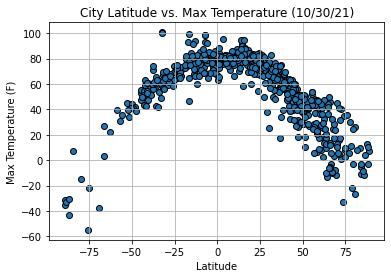

In [34]:
#1 Obtain mm/dd/yyyy date from the dataset

latitudes = clean_city_data[Keys.lat]
max_temps = clean_city_data[Keys.max_temp]

plt.scatter(latitudes, max_temps, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%y")})')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

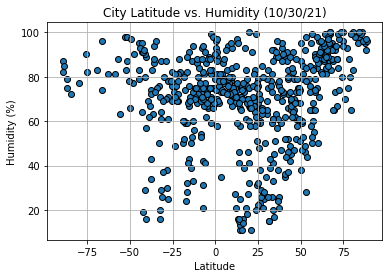

In [35]:
latitudes = clean_city_data[Keys.lat]
humidity  = clean_city_data[Keys.humidity]

plt.scatter(latitudes, humidity, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%y")})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

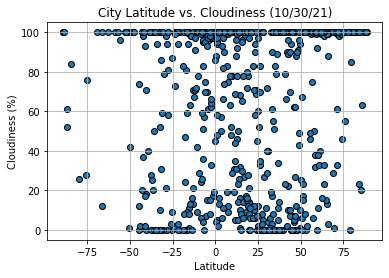

In [36]:
latitudes = clean_city_data[Keys.lat]
cloudiness  = clean_city_data[Keys.cloudiness]

plt.scatter(latitudes, cloudiness, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%y")})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

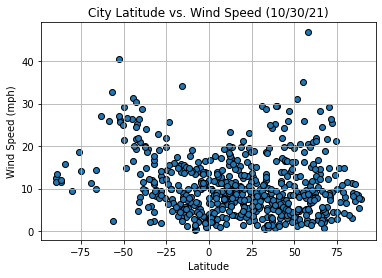

In [37]:
latitudes  = clean_city_data[Keys.lat]
wind_speed = clean_city_data[Keys.wind_speed]

plt.scatter(latitudes, wind_speed, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%y")})')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [38]:
#Latitude 0 is neither north or south
northern_hemisphere_df = clean_city_data.loc[clean_city_data[Keys.lat] > 0]
southern_hemisphere_df = clean_city_data.loc[clean_city_data[Keys.lat] < 0]

northern_max_temps = northern_hemisphere_df[Keys.max_temp]
southern_max_temps = southern_hemisphere_df[Keys.max_temp]

northern_cloudiness = northern_hemisphere_df[Keys.cloudiness]
southern_cloudiness = southern_hemisphere_df[Keys.cloudiness]

northern_humidity = northern_hemisphere_df[Keys.humidity]
southern_humidity = southern_hemisphere_df[Keys.humidity]

northern_wind_speed = northern_hemisphere_df[Keys.wind_speed]
southern_wind_speed = southern_hemisphere_df[Keys.wind_speed]

northern_latitudes = northern_hemisphere_df[Keys.lat]
southern_latitudes = southern_hemisphere_df[Keys.lat]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.7891343777109953


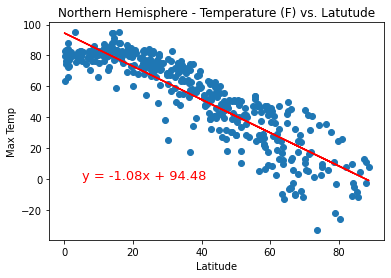

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_max_temps)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_max_temps)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (5, 0), fontsize=13, color="red")

plt.title(f'Northern Hemisphere - Temperature (F) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Temperature (F) vs. Latutude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-value is: 0.7688177278307156


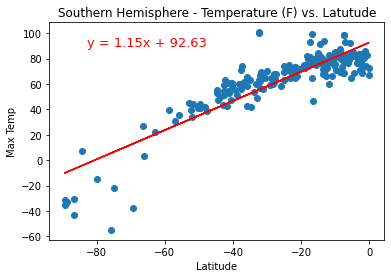

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_max_temps)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_max_temps)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-83, 90), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Temperature (F) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Temperature (F) vs. Latutude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.10618051750717018


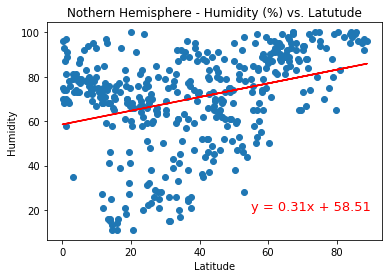

In [41]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_humidity)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_humidity)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (55, 20), fontsize=13, color="red")

plt.title(f'Nothern Hemisphere - Humidity (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.017278731564310725


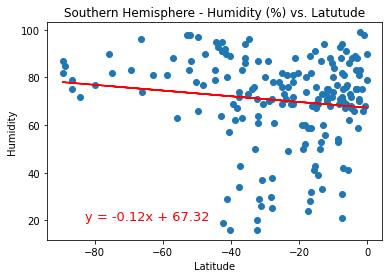

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_humidity)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_humidity)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-83, 20), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Humidity (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.03161203713996522


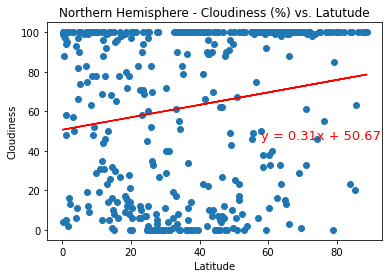

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_cloudiness)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_cloudiness)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (58, 46), fontsize=13, color="red")

plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../Output/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.0019071920649557966


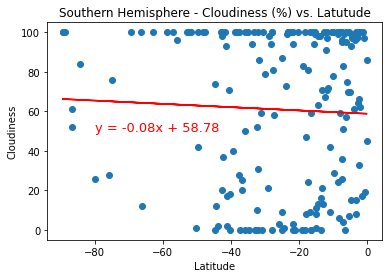

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_cloudiness)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_cloudiness)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-80, 50), fontsize=13, color="red") 

plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.004021247859757544


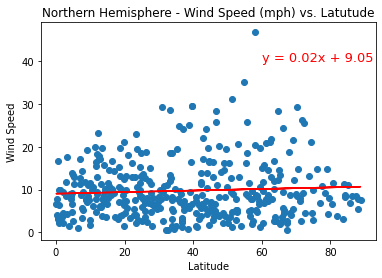

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, northern_wind_speed)

regress_values = northern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(northern_latitudes, northern_wind_speed)
plt.plot(northern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (60, 40), fontsize=13, color="red")

plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../Output/Nothern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-value is: 0.18762403411478643


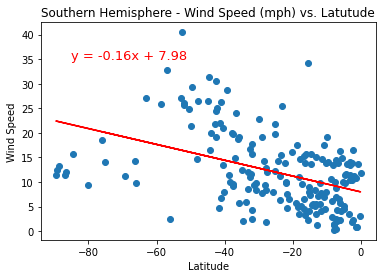

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, southern_wind_speed)

regress_values = southern_latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"\nThe r-value is: {rvalue**2}",sep="\n")

plt.scatter(southern_latitudes, southern_wind_speed)
plt.plot(southern_latitudes, regress_values,"r-")

plt.annotate(line_eq, (-85, 35), fontsize=13, color="red")

plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latutude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()